In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
xls = pd.ExcelFile('token_counting.xlsx', engine='openpyxl')
sheet_names = xls.sheet_names  # List of all sheet names
print(sheet_names)

['pretrain-count-v3', 'finetune-train-count', 'fintune-test-count', 'finetune-valid-count']


In [7]:
df = pd.read_excel('token_counting.xlsx', sheet_name='pretrain-count-v3', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,5,2653.0,0.0147,4.0
2,2.0,6.0,10,6533.0,0.0361,6152.0
3,3.0,11.0,15,44907.0,0.2480,85740.0
4,4.0,16.0,20,28599.0,0.1580,84618.0


In [8]:
df = df.dropna(subset=['Group', '# Methods', '# Method Calls'])
df

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
1,1.0,1.0,5,2653.0,0.0147,4.0
2,2.0,6.0,10,6533.0,0.0361,6152.0
3,3.0,11.0,15,44907.0,0.2480,85740.0
4,4.0,16.0,20,28599.0,0.1580,84618.0
5,5.0,21.0,25,21709.0,0.1199,86764.0
...,...,...,...,...,...,...
71,71.0,461.0,470,0.0,0.0000,0.0
72,72.0,471.0,480,1.0,0.0000,48.0
73,73.0,511.0,520,1.0,0.0000,100.0
74,74.0,881.0,890,1.0,0.0000,144.0


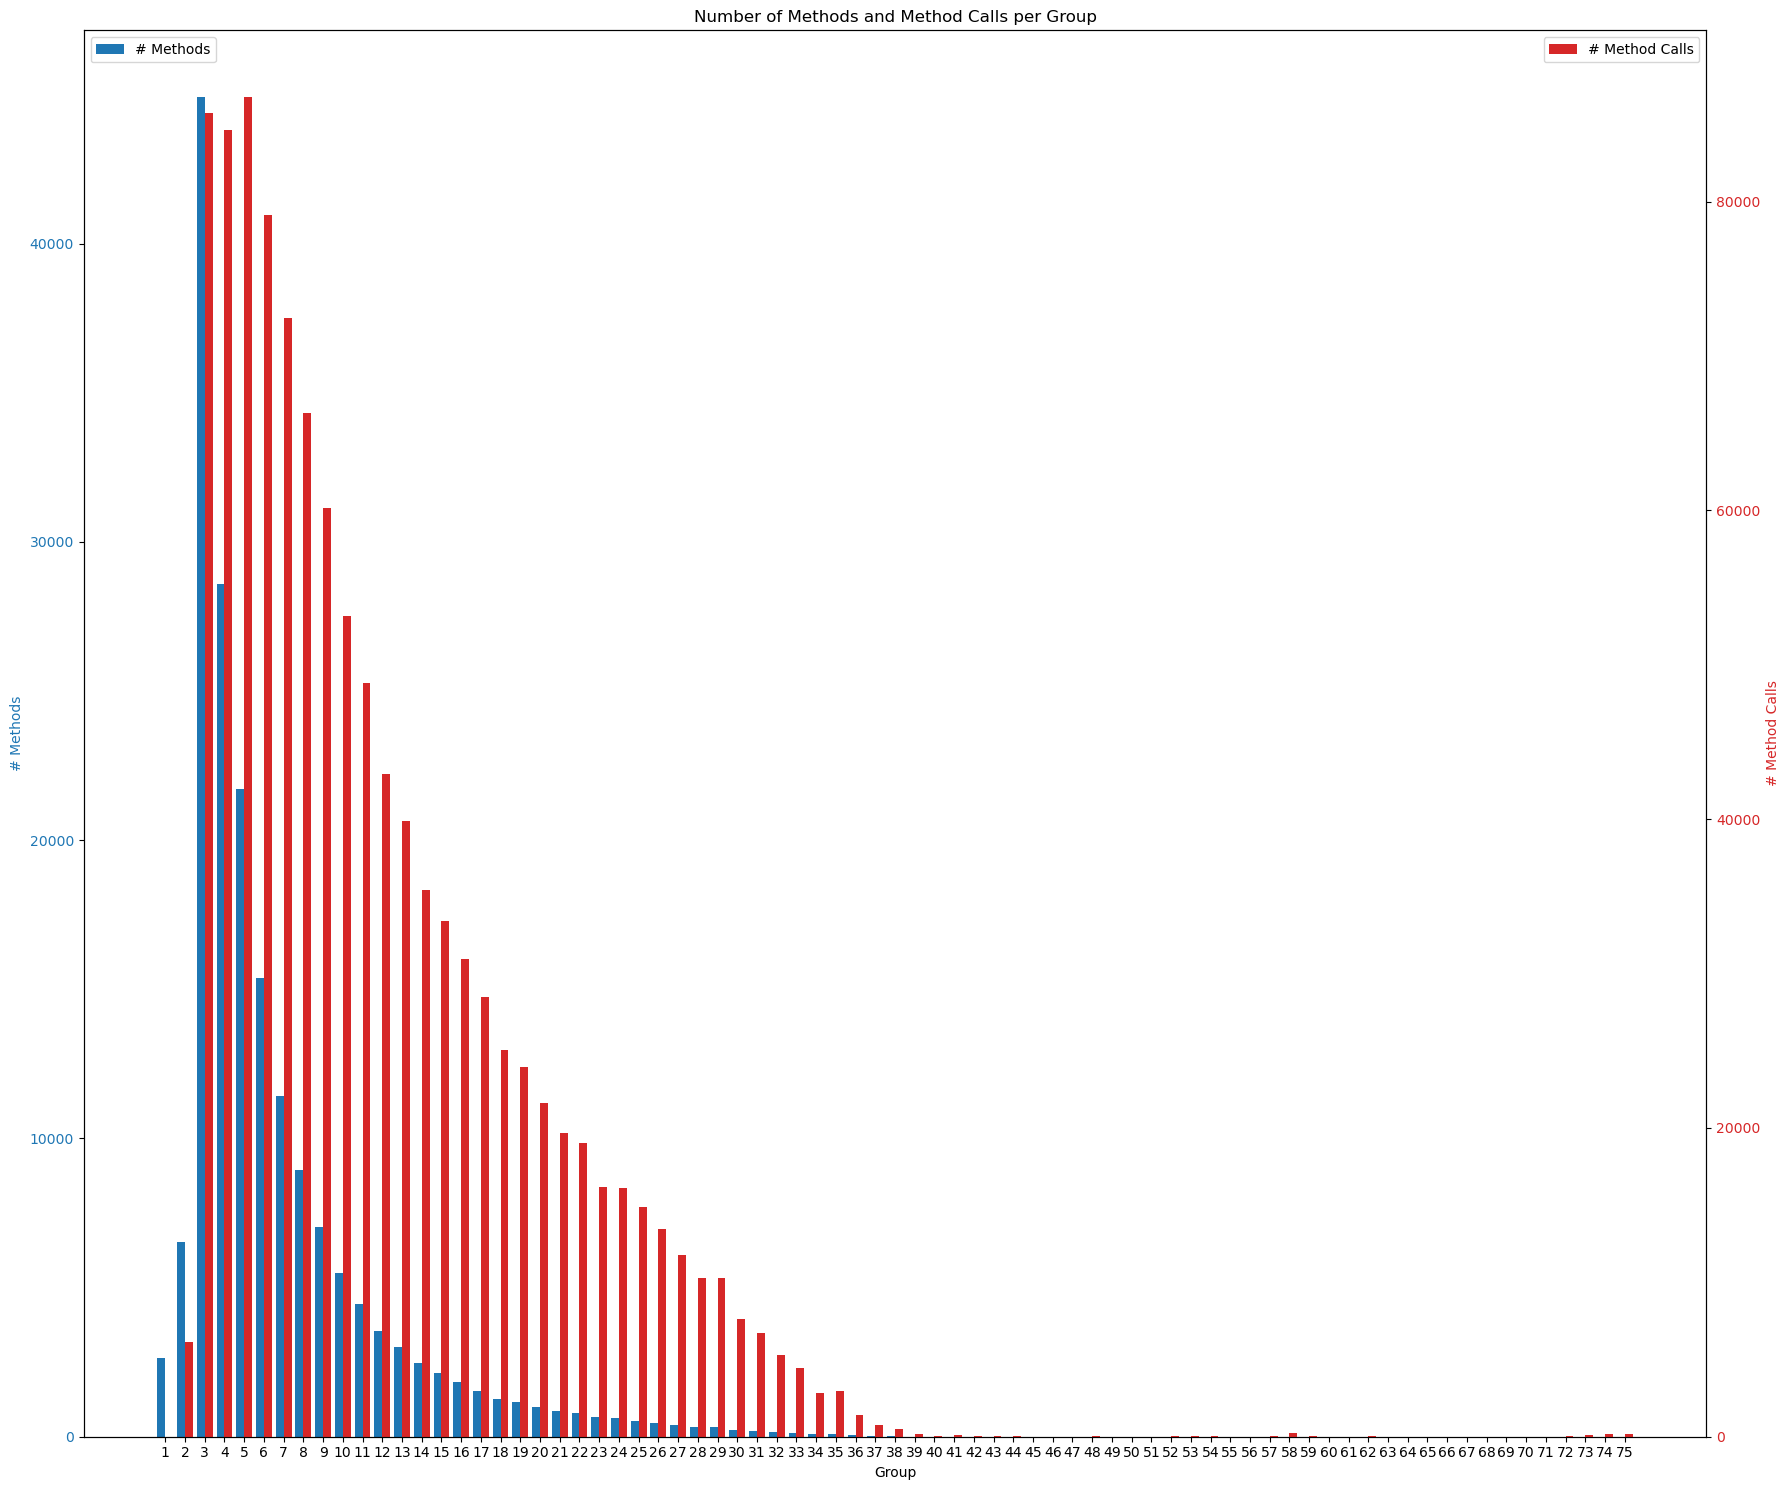

In [11]:

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(df['Group'] - 0.2, df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df['Group'])  # Ensure ticks correspond to groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(df['Group'] + 0.2, df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

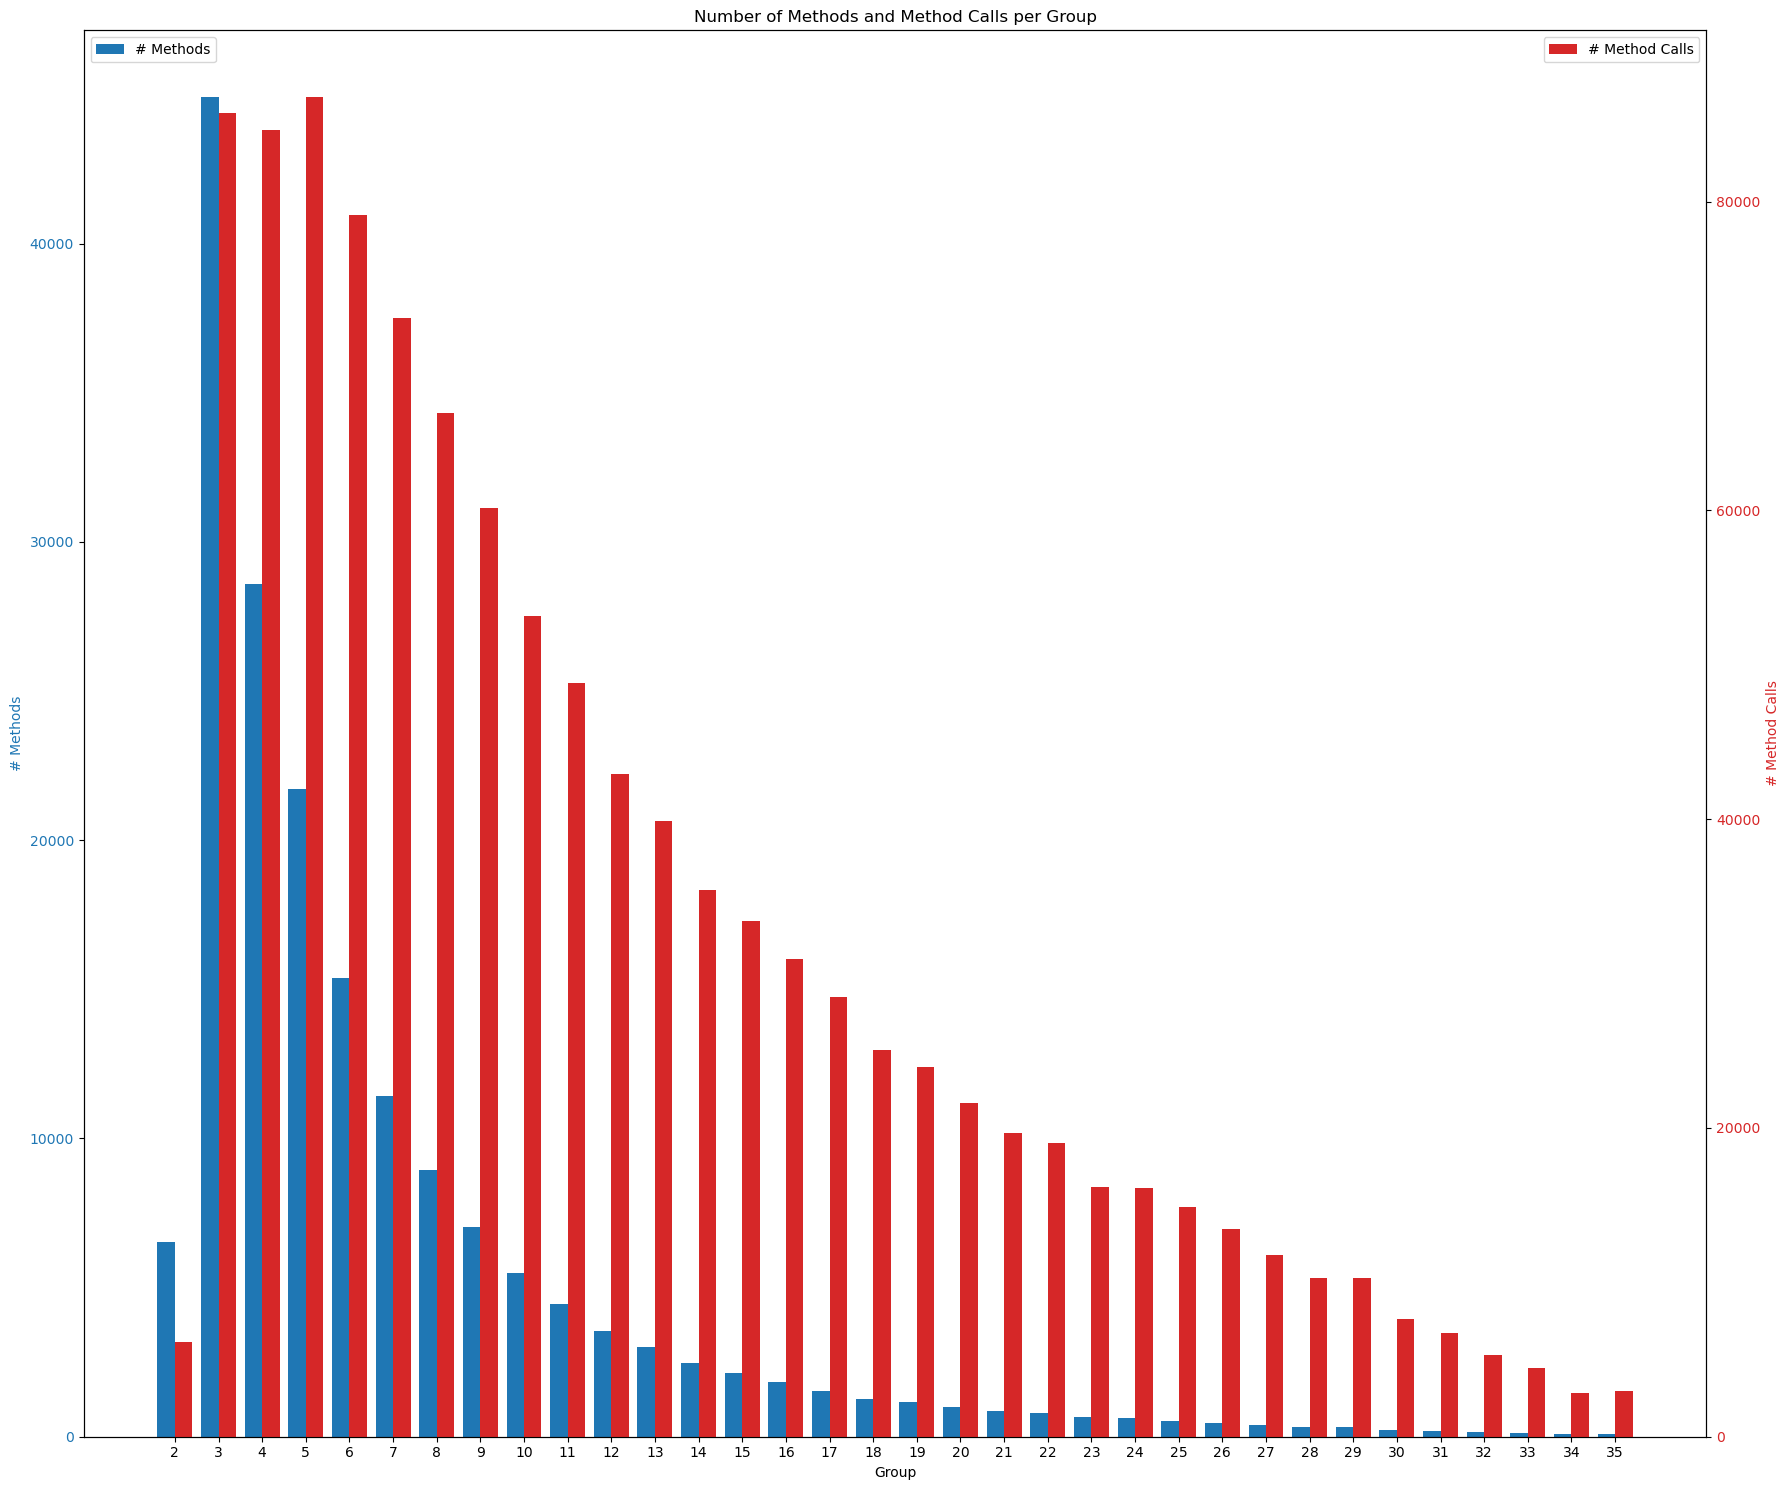

In [12]:

# Define a threshold for filtering out groups with low numbers
threshold_methods = 50  # Minimum number of methods
threshold_calls = 50    # Minimum number of method calls

# Filter DataFrame to only include rows where both conditions are met
filtered_df = df[(df['# Methods'] > threshold_methods) & (df['# Method Calls'] > threshold_calls)]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(filtered_df['Group'] - 0.2, filtered_df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(filtered_df['Group'])  # Ensure ticks correspond to filtered groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(filtered_df['Group'] + 0.2, filtered_df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [23]:
df = pd.read_excel('token_counting.xlsx', sheet_name='finetune-valid-count', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,542,0.0542,382
1,2.0,6.0,10,1954,0.1954,1526
2,3.0,11.0,15,1648,0.1648,2371
3,4.0,16.0,20,1066,0.1066,2006
4,5.0,21.0,25,818,0.0818,2179


In [24]:
df = df.dropna(subset=['Group', '# Methods', '# Method Calls'])
df

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,542,0.0542,382
1,2.0,6.0,10,1954,0.1954,1526
2,3.0,11.0,15,1648,0.1648,2371
3,4.0,16.0,20,1066,0.1066,2006
4,5.0,21.0,25,818,0.0818,2179
5,6.0,26.0,30,891,0.0891,2823
6,7.0,31.0,35,694,0.0694,2978
7,8.0,36.0,40,470,0.0470,2222
8,9.0,41.0,45,428,0.0428,2131
9,10.0,46.0,50,332,0.0332,2056


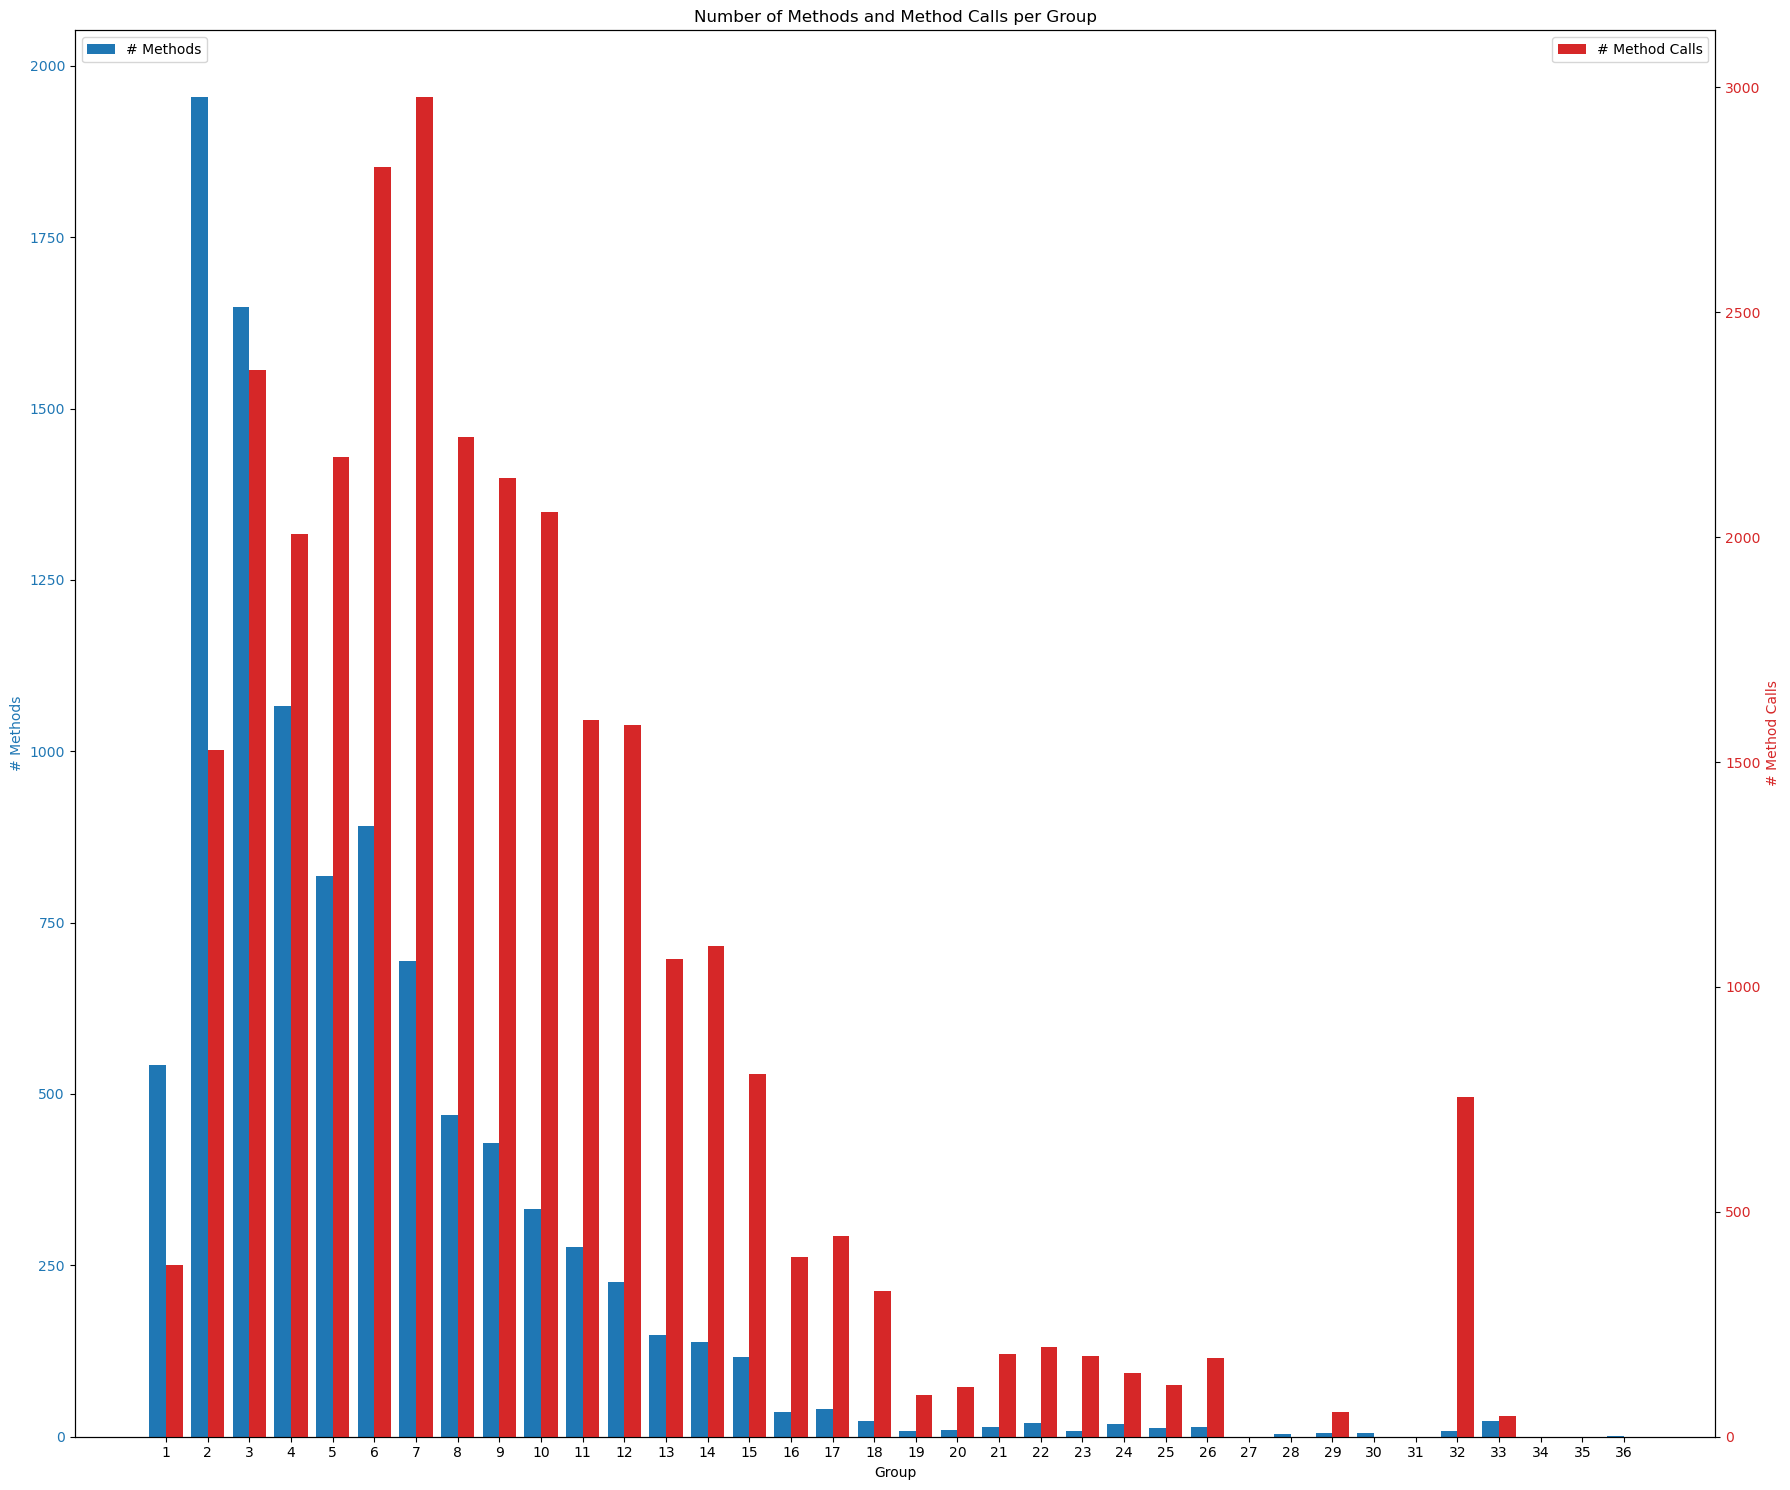

In [25]:
# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(df['Group'] - 0.2, df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df['Group'])  # Ensure ticks correspond to groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(df['Group'] + 0.2, df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [27]:
df = pd.read_excel('token_counting.xlsx', sheet_name='fintune-test-count', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,577,0.0289,369
1,2.0,6.0,10,2559,0.1280,3152
2,3.0,11.0,15,3238,0.1619,7681
3,4.0,16.0,20,2199,0.1100,7047
4,5.0,21.0,25,2076,0.1038,8177


In [28]:
df = df.dropna(subset=['Group', '# Methods', '# Method Calls'])
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,577,0.0289,369
1,2.0,6.0,10,2559,0.1280,3152
2,3.0,11.0,15,3238,0.1619,7681
3,4.0,16.0,20,2199,0.1100,7047
4,5.0,21.0,25,2076,0.1038,8177


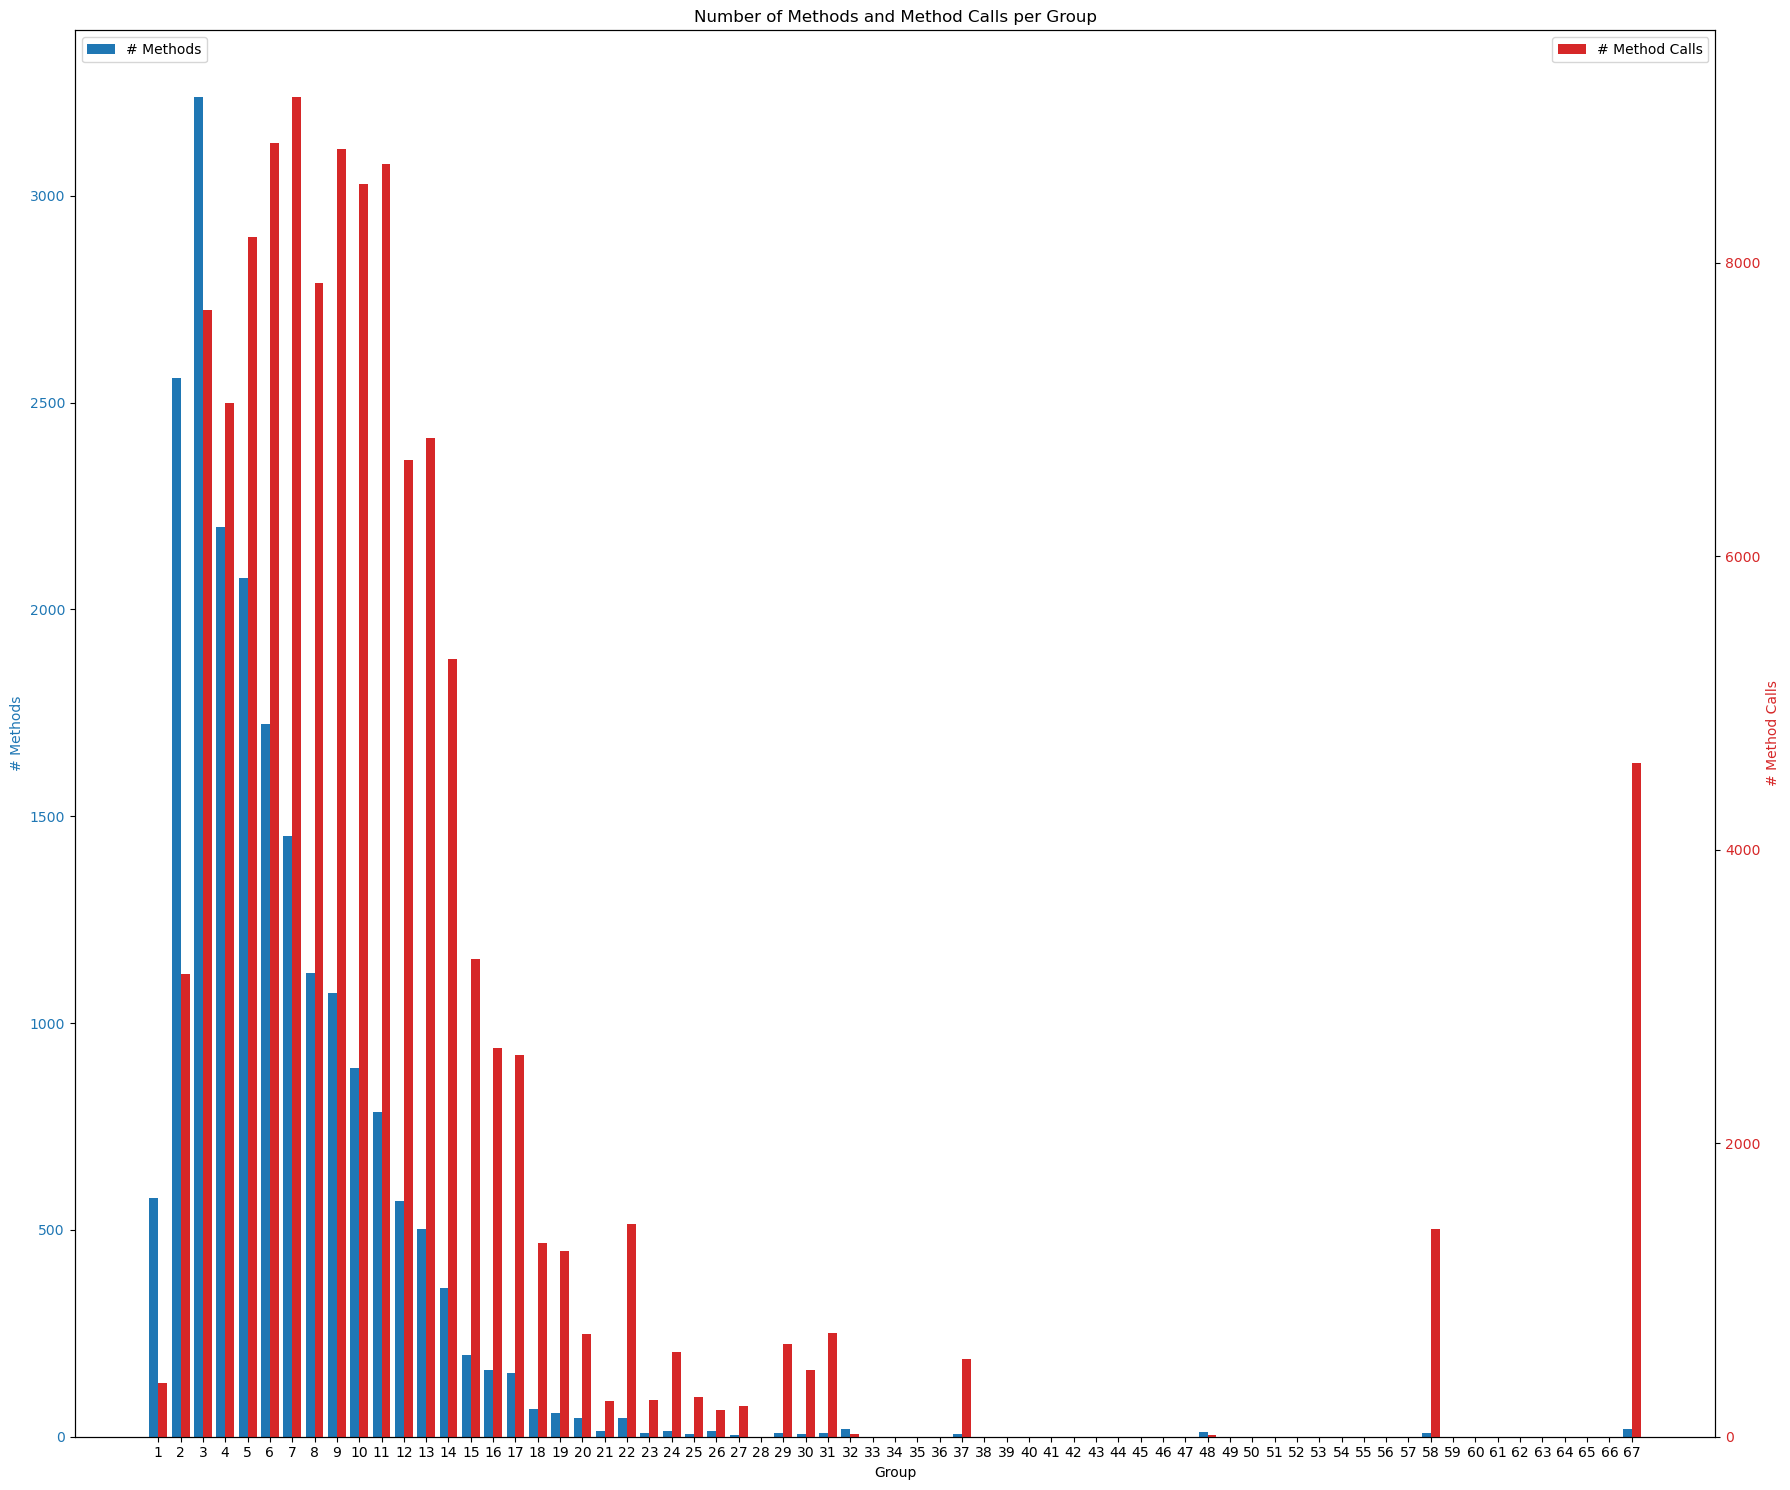

In [29]:
# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(df['Group'] - 0.2, df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df['Group'])  # Ensure ticks correspond to groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(df['Group'] + 0.2, df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [31]:
df = pd.read_excel('token_counting.xlsx', sheet_name='finetune-train-count', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,# Method Calls,Ratio of #Methods
0,1.0,1.0,5,40686,26560,0.0311
1,2.0,6.0,10,172111,209266,0.1314
2,3.0,11.0,15,166337,347371,0.1270
3,4.0,16.0,20,157803,462818,0.1205
4,5.0,21.0,25,141148,565957,0.1078


In [32]:
df = df.dropna(subset=['Group', '# Methods', '# Method Calls'])
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,# Method Calls,Ratio of #Methods
0,1.0,1.0,5,40686,26560,0.0311
1,2.0,6.0,10,172111,209266,0.1314
2,3.0,11.0,15,166337,347371,0.1270
3,4.0,16.0,20,157803,462818,0.1205
4,5.0,21.0,25,141148,565957,0.1078


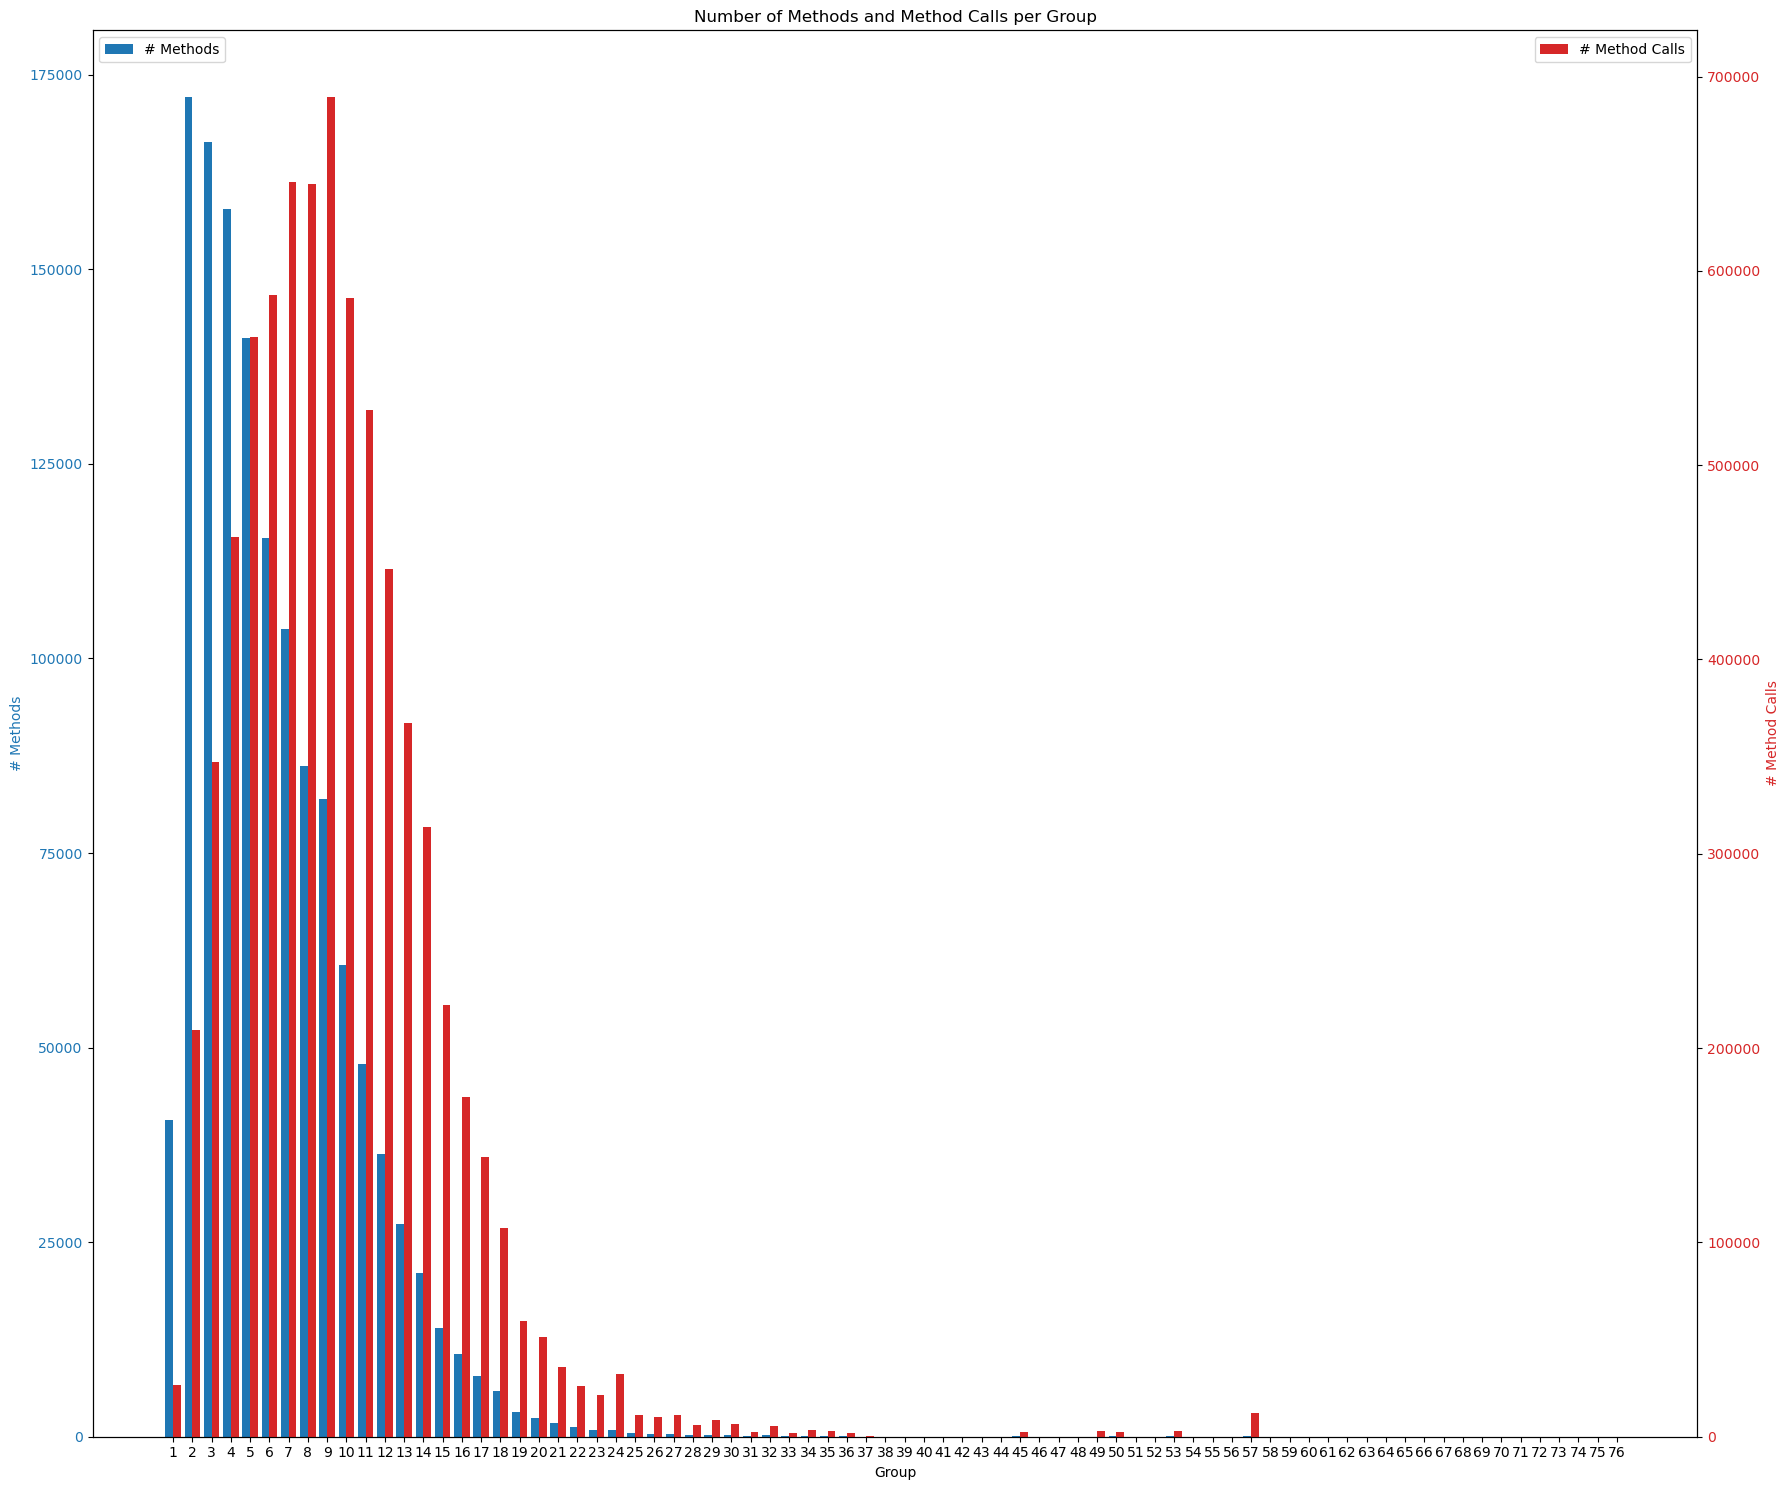

In [33]:
# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(df['Group'] - 0.2, df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df['Group'])  # Ensure ticks correspond to groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(df['Group'] + 0.2, df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

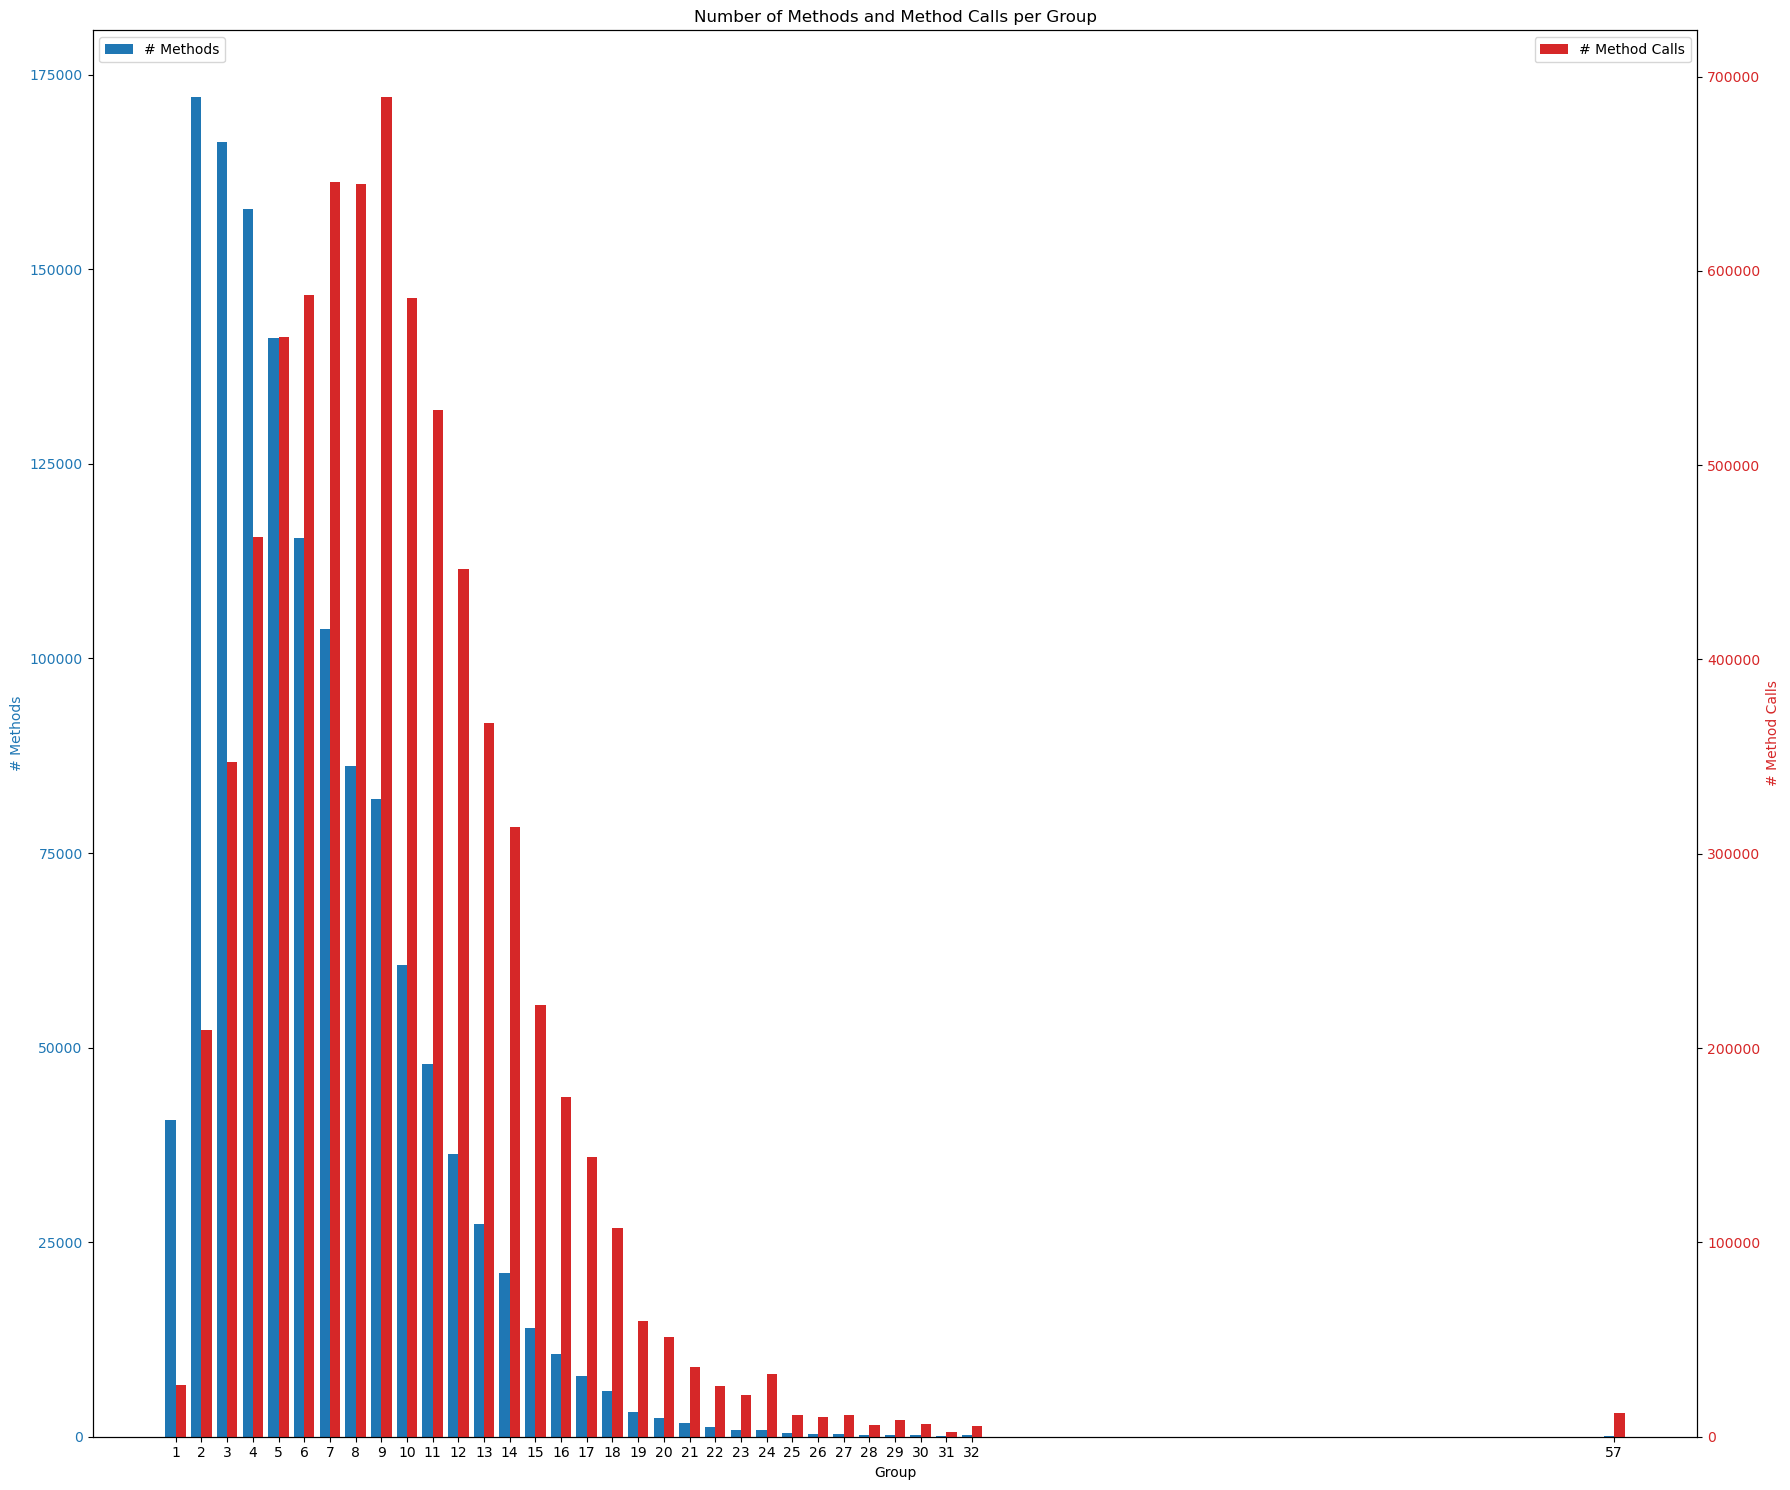

In [35]:

# Define a threshold for filtering out groups with low numbers
threshold_methods = 100  # Minimum number of methods
threshold_calls = 100    # Minimum number of method calls

# Filter DataFrame to only include rows where both conditions are met
filtered_df = df[(df['# Methods'] > threshold_methods) & (df['# Method Calls'] > threshold_calls)]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(18, 15))

# Bar graph for # Methods on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Group')
ax1.set_ylabel('# Methods', color=color)
ax1.bar(filtered_df['Group'] - 0.2, filtered_df['# Methods'], color=color, width=0.4, label='# Methods')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(filtered_df['Group'])  # Ensure ticks correspond to filtered groups

# Create a second y-axis for the # Method Calls
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('# Method Calls', color=color)
ax2.bar(filtered_df['Group'] + 0.2, filtered_df['# Method Calls'], color=color, width=0.4, label='# Method Calls')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Methods and Method Calls per Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'df' is your DataFrame with appropriate data loaded

# Create interactive Plotly graph
fig = go.Figure()

# Add bars for # Methods and # Method Calls
fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Methods'],
    name='Methods',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Method Calls'],
    name='Method Calls',
    marker_color='red'
))

# Update layout for a cleaner look
fig.update_layout(
    title='Number of Methods and Method Calls per Group',
    xaxis_title='Group',
    yaxis_title='Count',
    barmode='group',
    legend_title='Metric',
    plot_bgcolor='white',
    autosize=False,
    width=2500,  # Adjusted for full visibility of labels
    height=3000,
    margin=dict(l=50, r=50, t=100, b=50)
)

# Set y-axis to start from 1000 and increment by 1000
fig.update_yaxes(range=[1000, df[['# Methods', '# Method Calls']].max().max() * 1.1],
                 tickmode='linear', tick0=1000, dtick=1000)

# Ensure all x-axis labels are shown and are readable
fig.update_xaxes(tickmode='array', tickvals=df['Group'], ticktext=df['Group'])

# CSS to enable scrolling in the Plotly HTML output
scroll_html = """
<div style="overflow-x: auto; -webkit-overflow-scrolling: touch;">
    <div style="width: 2500px;">{}</div>
</div>
"""

# Uncomment below line if you are not using a Jupyter notebook and want to open in a browser
fig.show()


In [20]:
df = pd.read_excel('token_counting.xlsx', sheet_name='finetune-valid-count', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,542,0.0542,382
1,2.0,6.0,10,1954,0.1954,1526
2,3.0,11.0,15,1648,0.1648,2371
3,4.0,16.0,20,1066,0.1066,2006
4,5.0,21.0,25,818,0.0818,2179


In [22]:
fig = go.Figure()

# Add bars for # Methods and # Method Calls
fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Methods'],
    name='Methods',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Method Calls'],
    name='Method Calls',
    marker_color='red'
))

# Update layout for a cleaner look
fig.update_layout(
    title='Number of Methods and Method Calls per Group',
    xaxis_title='Group',
    yaxis_title='Count',
    barmode='group',
    legend_title='Metric',
    plot_bgcolor='white',
    autosize=False,
    width=2500,  # Adjusted for full visibility of labels
    height=800,
    margin=dict(l=50, r=50, t=100, b=50)
)
fig.update_yaxes(range=[1000, 5000], tickmode='linear', tick0=1000, dtick=1000)

fig.update_xaxes(tickmode='array', tickvals=df['Group'], ticktext=df['Group'],range=[1,14])

scroll_html = """
<div style="overflow-x: auto; -webkit-overflow-scrolling: touch;">
    <div style="width: 2500px;">{}</div>
</div>
"""

fig.show()

In [19]:
df = pd.read_excel('token_counting.xlsx', sheet_name='fintune-test-count', engine='openpyxl')
df.head(5)

,Group,"Ranges of Tokens, BGN","Ranges of Tokens, END",# Methods,Ratio of #Methods,# Method Calls
0,1.0,1.0,5,577,0.0289,369
1,2.0,6.0,10,2559,0.1280,3152
2,3.0,11.0,15,3238,0.1619,7681
3,4.0,16.0,20,2199,0.1100,7047
4,5.0,21.0,25,2076,0.1038,8177


In [22]:
fig = go.Figure()

# Add bars for # Methods and # Method Calls
fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Methods'],
    name='Methods',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df['Group'],
    y=df['# Method Calls'],
    name='Method Calls',
    marker_color='red'
))

# Update layout for a cleaner look
fig.update_layout(
    title='Number of Methods and Method Calls per Group',
    xaxis_title='Group',
    yaxis_title='Count',
    barmode='group',
    legend_title='Metric',
    plot_bgcolor='white',
    autosize=False,
    width=2500,  # Adjusted for full visibility of labels
    height=800,
    margin=dict(l=50, r=50, t=100, b=50)
)
fig.update_yaxes(range=[1000, 10000], tickmode='linear', tick0=1000, dtick=1000)

fig.update_xaxes(tickmode='array', tickvals=df['Group'], ticktext=df['Group'])

scroll_html = """
<div style="overflow-x: auto; -webkit-overflow-scrolling: touch;">
    <div style="width: 2500px;">{}</div>
</div>
"""

fig.show()

In [32]:
import pandas as pd
import plotly.graph_objects as go
import os

# Path to your Excel file
excel_path = 'token_counting.xlsx'

# Name of the sheet to exclude
exclude_sheet_name = 'finetune-train-count'


# Load the Excel file, and get all sheet names
xls = pd.ExcelFile(excel_path)

# Create a directory for the HTML files if you choose to save them
output_dir = 'plotly_graphs'
os.makedirs(output_dir, exist_ok=True)

# Iterate through all the sheets
for sheet_name in xls.sheet_names:
    # Skip the sheet we want to exclude
    if sheet_name == exclude_sheet_name:
        continue
    
    # Read each sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Create a Plotly graph
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=df['Group'],
        y=df['# Methods'],
        name='Methods',
        marker_color='blue'
    ))
    
    fig.add_trace(go.Bar(
        x=df['Group'],
        y=df['# Method Calls'],
        name='Method Calls',
        marker_color='red'
    ))
    
    # Update layout for a cleaner look
    fig.update_layout(
        title=f'Number of Methods and Method Calls per Group - {sheet_name}',
        xaxis_title='Group',
        yaxis_title='Count',
        barmode='group',
        legend_title='Metric',
        plot_bgcolor='white',
        autosize=False,
        width=1200,
        height=600,
        margin=dict(l=50, r=50, t=100, b=50)
    )
    
    fig.show()
    # Save each figure as an HTML file
    html_file_path = os.path.join(output_dir, f'{sheet_name}_plot.html')
    fig.write_html(html_file_path, auto_open=False)

print("All graphs have been generated and saved, except for the excluded sheet.")
    
    

All graphs have been generated and saved, except for the excluded sheet.
